# Handling Imbalanced Data with SMOTE

In this notebook, we will explore how to handle imbalanced datasets using Synthetic Minority Over-sampling Technique (SMOTE). We will use a sample dataset and demonstrate how to apply SMOTE to balance the dataset. We will then train a Logistic Regression and a Decision Tree classifier and evaluate their performance.


# Imports and Setup

First, we will import the necessary libraries required for our analysis.


import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, accuracy_score

# Loading the Data

We will create a sample dataset to work with. In a real-world scenario, you would load your dataset from a file.


In [2]:
dataframe = pd.read_csv('creditcard.csv')

# Data Preprocessing

Before we apply any machine learning algorithms, we need to preprocess the data. This includes splitting the data into training and testing sets.


In [3]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


### *As class dtype is int64, and class is basically which we need to predict. And this is Super bias machine learning problem*

In [5]:
dataframe.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
pd.options.display.max_columns = None

In [7]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
dataframe.shape

(284807, 31)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
dataframe['Amount'] = sc.fit_transform(pd.DataFrame(dataframe['Amount']))

In [11]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
dataframe = dataframe.drop(['Time'], axis=1)

In [13]:
dataframe.duplicated().any()

True

In [14]:
dataframe.duplicated().sum()

9144

In [29]:
dataframe = dataframe.drop_duplicates()

In [30]:
dataframe.duplicated().sum()

0

In [31]:
dataframe['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

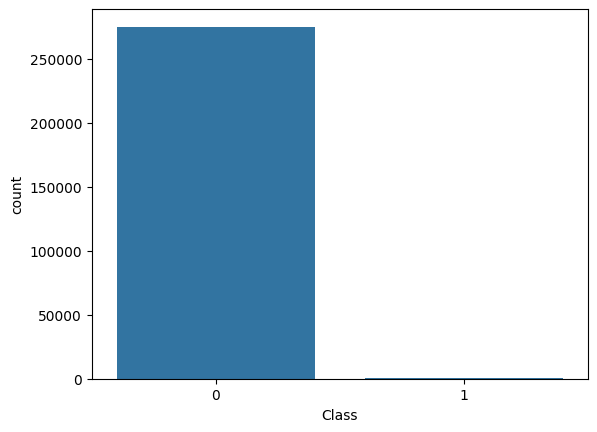

In [32]:
sb.countplot(x='Class', data=dataframe)

# Display the plot
plt.show()

In [33]:
X = dataframe.drop('Class' ,axis = 1)
Y = dataframe['Class']

# Model Training and Evaluation

We will train a Logistic Regression and a Decision Tree classifier on the resampled data and evaluate their performance using accuracy and classification reports.


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

In [35]:
classifiers = {
    'Logistic Regression Model': LogisticRegression(),
    'Decision Tree Model': DecisionTreeClassifier()
}
for name, clf, in classifiers.items():
    print(f"\n============== {name} ================")
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))
    


============== Logistic Regression Model ================
Accuracy: 0.9992
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.89      0.60      0.72        91

    accuracy                           1.00     55133
   macro avg       0.94      0.80      0.86     55133
weighted avg       1.00      1.00      1.00     55133


============== Decision Tree Model ================
Accuracy: 0.9990
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.68      0.74      0.71        91

    accuracy                           1.00     55133
   macro avg       0.84      0.87      0.85     55133
weighted avg       1.00      1.00      1.00     55133



### Handling UnderSampling

In [36]:
normal = dataframe[dataframe['Class'] == 0]
fraud = dataframe[dataframe['Class'] == 1]

In [37]:
normal.shape

(275190, 30)

In [38]:
fraud.shape

(473, 30)

In [39]:
normal_sample = normal.sample(n=473)

In [40]:
normal_sample.shape

(473, 30)

In [41]:
new_dataframe = pd.concat([normal_sample, fraud], ignore_index=True)

In [42]:
new_dataframe.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.024485,-2.304575,0.664199,-0.377223,-4.732620,3.498304,4.259654,-0.929751,-0.463516,0.160352,0.966000,-0.894350,-0.569458,-1.292733,-0.492253,0.795139,0.443073,-1.027526,1.903347,-0.689325,-0.398995,0.797191,1.046637,-0.234708,0.021939,-0.136160,0.509718,-0.818924,3.990132,0
1,-1.113273,0.009239,1.459956,-2.425584,-0.306915,1.001422,-0.792360,-1.951647,-1.812568,2.058314,0.455658,-0.875951,0.286120,-0.921312,-0.179043,-0.814295,0.370478,0.833310,1.335619,-0.469561,1.335553,-0.396542,-0.170665,0.189904,0.355006,0.019282,-0.680075,-0.381030,-0.329241,0
2,-0.128803,1.208838,-0.422170,-0.700690,0.947640,-0.502414,0.885474,0.032354,-0.214916,-0.382093,1.288553,0.949263,0.476740,-0.993781,-0.950736,0.385092,0.174135,0.062685,-0.090846,0.181032,-0.300325,-0.650364,0.103326,0.613327,-0.412486,0.094972,0.332124,0.135630,-0.348072,0
3,2.017600,-1.795668,-0.465084,-1.374096,-1.800480,-0.747904,-1.160132,-0.209514,-1.036741,1.448309,-0.930899,-0.488672,0.929604,-0.649289,0.041174,-0.232410,0.340505,-0.175012,-0.163076,-0.145443,-0.325438,-0.730680,0.340594,-0.077873,-0.636716,-0.497016,0.016133,-0.011945,0.220496,0
4,-0.650592,0.938051,2.172784,-0.547236,0.328015,-0.909602,1.096545,-0.335997,-0.510452,-0.640745,-0.322968,0.021663,0.292822,-0.145062,0.465393,0.361362,-0.750422,-0.492744,-0.606313,0.005783,-0.254831,-0.669217,-0.227411,0.368938,0.203976,-0.018847,-0.175672,-0.161679,-0.348072,0


In [43]:
new_dataframe['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [46]:
X = new_dataframe.drop('Class', axis = 1)
Y = new_dataframe['Class']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

In [48]:
classifiers = {
    'Logistic Regression Model': LogisticRegression(),
    'Decision Tree Model': DecisionTreeClassifier()
}
for name, clf, in classifiers.items():
    print(f"\n============== {name} ================")
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))
    


============== Logistic Regression Model ================
Accuracy: 0.9579
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        88
           1       1.00      0.92      0.96       102

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190


============== Decision Tree Model ================
Accuracy: 0.9211
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        88
           1       0.92      0.93      0.93       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



### Working with Over Sampling

In [49]:
X = dataframe.drop('Class', axis = 1)
Y = dataframe['Class']

In [50]:
X.shape

(275663, 29)

In [51]:
Y.shape

(275663,)

# Handling Imbalanced Data with SMOTE

Since our dataset is balanced for demonstration purposes, let's simulate an imbalanced dataset and then apply SMOTE to balance it.


In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
X_res, Y_res = SMOTE().fit_resample(X,Y)

In [59]:
Y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size= 0.2, random_state = 42)

In [61]:
classifiers = {
    'Logistic Regression Model': LogisticRegression(),
    'Decision Tree Model': DecisionTreeClassifier()
}
for name, clf, in classifiers.items():
    print(f"\n============== {name} ================")
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))
    


============== Logistic Regression Model ================
Accuracy: 0.9460
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     55073
           1       0.97      0.92      0.94     55003

    accuracy                           0.95    110076
   macro avg       0.95      0.95      0.95    110076
weighted avg       0.95      0.95      0.95    110076


============== Decision Tree Model ================
Accuracy: 0.9982
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



# Conclusion

In this notebook, we demonstrated how to handle imbalanced datasets using SMOTE. We applied SMOTE to balance the training data and trained two classifiers: Logistic Regression and Decision Tree. We evaluated their performance using accuracy and classification reports. Balancing the dataset with SMOTE helped improve the performance of the classifiers.


## Why SMOTE is Used

When dealing with imbalanced datasets, where one class significantly outnumbers the other, machine learning models tend to be biased towards the majority class. This bias often results in poor performance, especially in predicting the minority class.

### Challenges with Imbalanced Data
- **Bias towards Majority Class**: Models trained on imbalanced data might predict the majority class more often, ignoring the minority class.
- **Skewed Performance Metrics**: Common performance metrics like accuracy can be misleading. For example, in a dataset with 90% of instances belonging to one class, a model predicting only the majority class can achieve 90% accuracy but will perform poorly on the minority class.

### Addressing Imbalance with SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a powerful technique used to balance the dataset by generating synthetic examples for the minority class. It works by:
1. **Selecting Minority Class Instances**: Randomly choosing instances from the minority class.
2. **Generating Synthetic Samples**: Creating new synthetic samples by interpolating between the selected instances and their nearest neighbors.

### Benefits of SMOTE
- **Improved Model Performance**: Balancing the dataset helps models learn the decision boundary more effectively, improving their performance on both classes.
- **Better Generalization**: Models trained on balanced datasets tend to generalize better to unseen data.
- **Enhanced Metrics**: Using SMOTE can lead to more meaningful performance metrics, providing a clearer picture of the model's capabilities.

In this notebook, we apply SMOTE to our imbalanced dataset before training our machine learning models to ensure a balanced representation of both classes.
